In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from sklearn.utils import resample
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)

<module 'classification_modules' from 'C:\\Users\\shfar\\Desktop\\SU\\Thesis\\thesis\\classification_modules.py'>

In [28]:
# set configurations
sample_size = 500
nr_sample = 20
x_b = np.linspace(0,1,20)
x_h = np.linspace(0,20,40)

### Bounded distributions

In [29]:
bounded_dists = dm.get_bounded_distribution()
bounded_samples = dm.get_samples(bounded_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(bounded_samples)

In [30]:
kde_df = dem.get_kde(bounded_samples, x_b)
kde_df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,dist
0,0.916544,1.060729,1.058190,0.962609,0.844312,0.742177,0.669137,0.630961,0.629785,0.659038,...,0.733225,0.743839,0.745255,0.770946,0.849431,0.967903,1.057507,1.030103,0.851083,arcsine
1,0.931997,1.105952,1.140556,1.068421,0.950785,0.831977,0.730415,0.650014,0.589555,0.547742,...,0.533922,0.573477,0.645942,0.747319,0.869601,0.992540,1.071790,1.047250,0.886817,arcsine
2,0.856801,1.047807,1.104010,1.041399,0.920151,0.799312,0.711065,0.658818,0.628809,0.607331,...,0.600299,0.632051,0.684538,0.754190,0.849219,0.971010,1.077994,1.086474,0.937792,arcsine
3,0.919727,1.072235,1.069766,0.955113,0.807254,0.684745,0.609584,0.579278,0.581012,0.600334,...,0.654682,0.687110,0.730532,0.796272,0.894375,1.014292,1.105135,1.090478,0.927540,arcsine
4,0.992079,1.171835,1.189523,1.085548,0.935151,0.797944,0.703836,0.657853,0.648653,0.659577,...,0.694923,0.709758,0.727892,0.761416,0.817729,0.885198,0.925642,0.886062,0.737331,arcsine


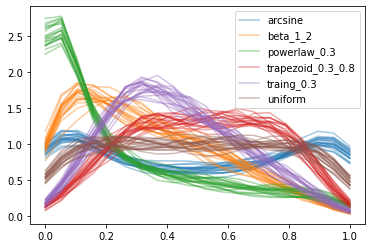

In [31]:
dem.get_kde_plot(kde_df,x_b)

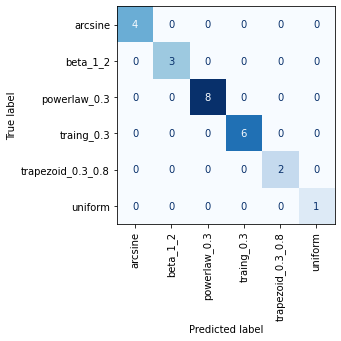

array([1., 1., 1., 1., 1.])

In [32]:
test_size = 0.2
cv = 5
cm.svm_model(kde_df, test_size, cv, plot=1)

In [12]:
# testing number of intervals vs accuracy
acc_mean = []
acc_std = []
intervals = list(range(10,200,5))

for i in intervals:
    x = np.linspace(0,1,i)
    kde_df = dem.get_kde(bounded_dists, nr_sample, sample_size, x)
    score = cm.svm_model(kde_df, test_size, cv)
    acc_mean.append(score.mean())
    acc_std.append(score.std())

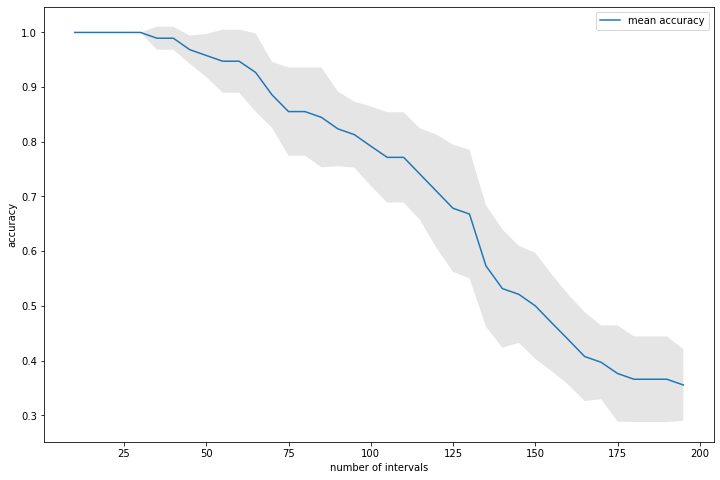

In [13]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(intervals,acc_mean, label='mean accuracy')

plt.gca().fill_between(intervals,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('number of intervals')
plt.ylabel('accuracy')
plt.legend();

### Heavytail distributions

In [33]:
heavytail_dists = dm.get_heavytail_distribution()
heavytail_samples = dm.get_samples(heavytail_dists, nr_sample, sample_size)
#dm.plot_histograms_of_samples(heavytail_samples)

In [34]:
kde_df = dem.get_kde(heavytail_samples, x_h)
kde_df.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,dist
0,0.127659,0.136440,0.139972,0.138024,0.131041,0.120033,0.106347,0.091413,0.076515,0.062638,...,0.001599,0.001665,0.001747,0.001824,0.001874,0.001882,0.001841,0.001752,0.001626,cauchy
1,0.042466,0.042851,0.043093,0.043189,0.043140,0.042947,0.042611,0.042138,0.041531,0.040798,...,0.012698,0.011677,0.010717,0.009816,0.008975,0.008193,0.007467,0.006796,0.006178,cauchy
2,0.089789,0.093121,0.094830,0.094853,0.093220,0.090052,0.085546,0.079957,0.073577,0.066705,...,0.002745,0.002583,0.002462,0.002372,0.002307,0.002257,0.002216,0.002181,0.002146,cauchy
3,0.000493,0.000493,0.000493,0.000493,0.000493,0.000493,0.000493,0.000493,0.000493,0.000493,...,0.000493,0.000493,0.000493,0.000493,0.000493,0.000493,0.000493,0.000493,0.000493,cauchy
4,0.040845,0.041134,0.041297,0.041334,0.041243,0.041028,0.040689,0.040230,0.039656,0.038973,...,0.012956,0.011976,0.011049,0.010177,0.009360,0.008596,0.007886,0.007228,0.006620,cauchy


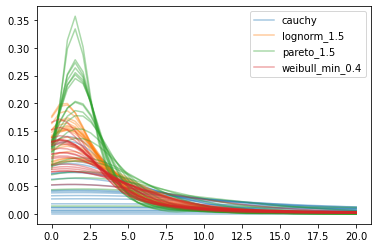

In [35]:
dem.get_kde_plot(kde_df, x_h)

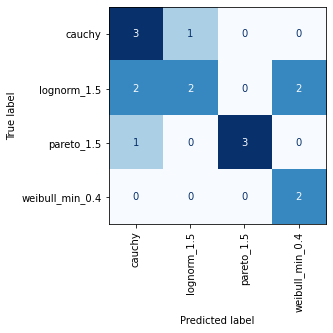

array([0.76923077, 0.69230769, 0.61538462, 0.76923077, 0.66666667])

In [26]:
test_size = 0.2
cv = 5
cm.svm_model(kde_df, test_size, cv, plot=1)

In [141]:
# testing number of intervals vs accuracy
acc_mean = []
acc_std = []
intervals = list(range(40,200,5))

for i in intervals:
    x = np.linspace(0,20,i)
    kde_df = dem.get_kde_l(longtail_dists, nr_sample, sample_size, x, 0.05)
    score = cm.svm_model(kde_df, test_size, cv)
    acc_mean.append(score.mean())
    acc_std.append(score.std())

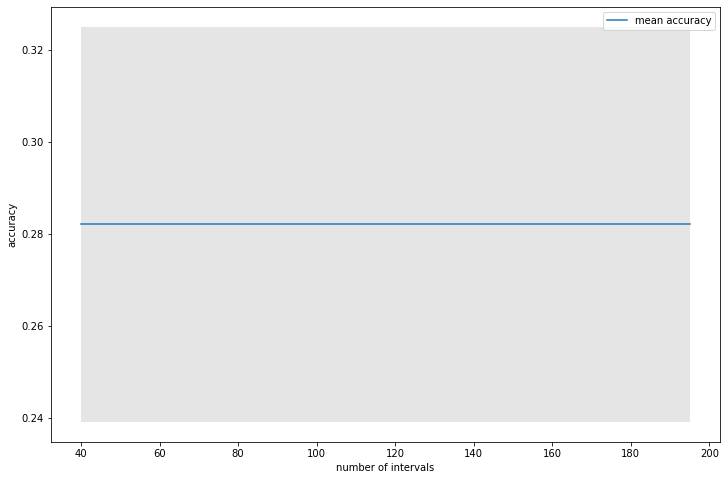

In [142]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(intervals,acc_mean, label='mean accuracy')

plt.gca().fill_between(intervals,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('number of intervals')
plt.ylabel('accuracy')
plt.legend();

In [186]:
# testing bandwidth vs accuracy
acc_mean = []
acc_std = []
bandwidth = np.linspace(0.000001,0.005,20)
x = np.linspace(0,20,50)
for i in bandwidth:
    kde_df = dem.get_kde_l(longtail_dists, nr_sample, sample_size, x, i)
    score = cm.svm_model(kde_df, test_size, cv)
    acc_mean.append(score.mean())
    acc_std.append(score.std())

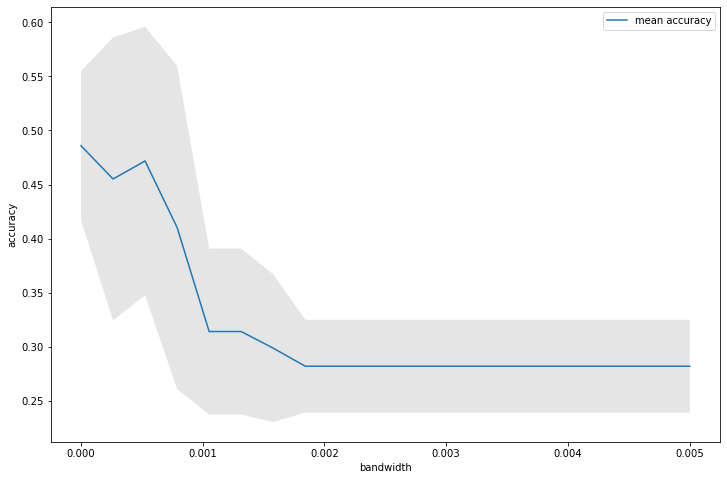

In [187]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(bandwidth,acc_mean, label='mean accuracy')

plt.gca().fill_between(bandwidth,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.legend();

In [15]:
x = np.linspace(0,20,40)
bandwidth = 0.01
kde_df_l = dem.get_kde_l(longtail_dists, nr_sample, sample_size, x, bandwidth)
kde_df_l.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,dist
0,0.230843,0.906539,0.529108,0.135842,0.085354,0.149828,0.144632,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.14703,0.0,0.0,0.000000,cauchy
1,0.369828,0.705887,0.000000,0.256395,0.132713,0.104094,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,cauchy
2,0.514811,0.470837,0.264222,0.000000,0.132393,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,cauchy
3,0.111593,0.319880,0.294307,0.289939,0.000000,0.132155,0.095933,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.000000,cauchy
4,0.555803,0.475209,0.416877,0.022609,0.000000,0.282759,0.103356,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.087279,cauchy


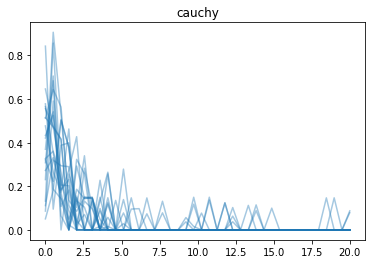

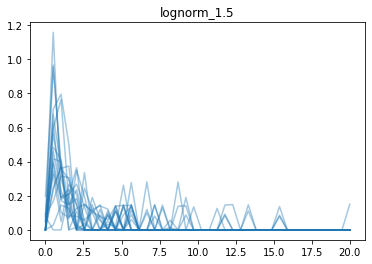

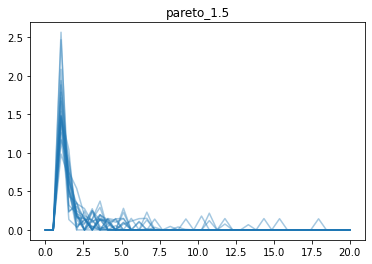

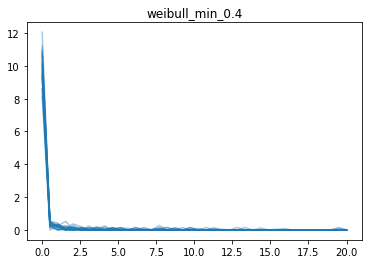

In [16]:
dem.get_kde_plot(longtail_dists, kde_df_l, nr_sample, sample_size, x)

In [17]:
# testing bandwidth vs accuracy
acc_mean = []
acc_std = []
bandwidth = np.linspace(0.00001,0.1,20)
x = np.linspace(0,20,50)
for i in bandwidth:
    kde_df = dem.get_kde_l(longtail_dists, nr_sample, sample_size, x, i)
    score = cm.svm_model(kde_df, test_size, cv)
    acc_mean.append(score.mean())
    acc_std.append(score.std())

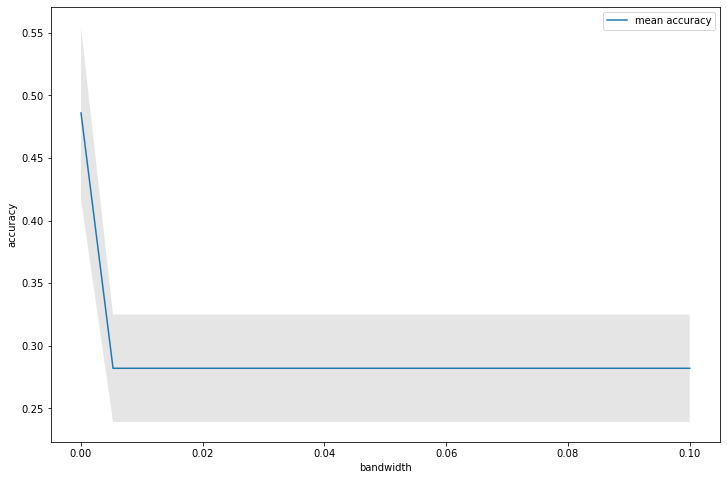

In [18]:
plt.figure(figsize=(12, 8))
ax = plt.gca()
plt.plot(bandwidth,acc_mean, label='mean accuracy')

plt.gca().fill_between(bandwidth,
                       [i-j for i,j in zip(acc_mean, acc_std)], 
                       [i+j for i,j in zip(acc_mean, acc_std)],
                       facecolor='gray', 
                       alpha=0.2)

plt.xlabel('bandwidth')
plt.ylabel('accuracy')
plt.legend();